In [2]:
#%matplotlib inline
#import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output, display
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

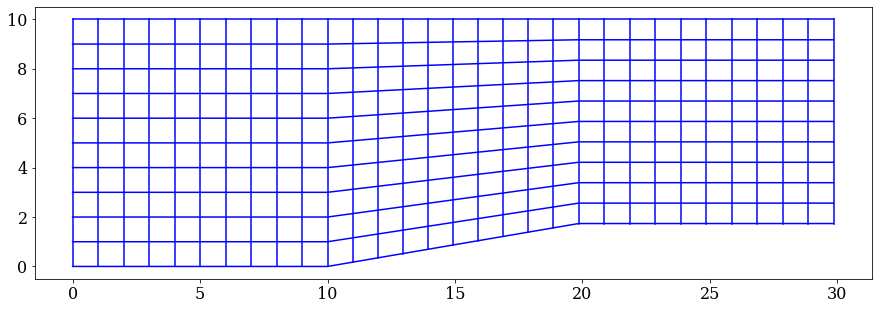

In [3]:
x1 = 0
x2 = 10
alpha = np.radians(10)
x3 = x2+np.cos(alpha)*10
x4 = x3+10
y1 = 0
y2 = np.sin(alpha)*10
y3 = 10
x_in = np.linspace(x1,x2,11)
x_mid = np.linspace(x2,x3,11)
x_out = np.linspace(x3,x4,11)
y_in = np.linspace(y1,y3,11)
y_out = np.linspace(y2,y3,11)
xmesh_in,ymesh_in = np.meshgrid(x_in,y_in)
xmesh_out,ymesh_out = np.meshgrid(x_out,y_out)
xmesh_mid,ymesh_mid = np.meshgrid(x_mid,y_in)
for i in range(11):
    a = i/10
    ymesh_mid[:,i] = y_in*(1-a) + y_out*a
x_mesh = np.hstack([xmesh_in,xmesh_mid[:,1:],xmesh_out[:,1:]])
y_mesh = np.hstack([ymesh_in,ymesh_mid[:,1:],ymesh_out[:,1:]])

def plotgrid(X,Y):
    plt.figure(figsize=(15,5))
    plt.plot(X,Y,c='b')
    plt.plot(X.T,Y.T,c='b')
    
plotgrid(x_mesh,y_mesh)

In [4]:
down_x_mesh = x_mesh[:-1, 1:] - x_mesh[:-1, :-1]
down_y_mesh = y_mesh[:-1, 1:] - y_mesh[:-1, :-1]
right_x_mesh = x_mesh[1:, 1:] - x_mesh[:-1, 1:]
right_y_mesh = y_mesh[1:, 1:] - y_mesh[:-1, 1:]
up_x_mesh = x_mesh[1:, :-1] - x_mesh[1:, 1:]
up_y_mesh = y_mesh[1:, :-1] - y_mesh[1:, 1:]
left_x_mesh = x_mesh[:-1, :-1] - x_mesh[1:, :-1]
left_y_mesh = y_mesh[:-1, :-1] - y_mesh[1:, :-1]

def normal(dx, dy):
    ds = np.sqrt(dx * dx + dy * dy)
    return np.array([dy / ds, -dx / ds])
def area(dx, dy):
    return np.array([dy, -dx])
def vol(diag1, diag2):
    vec = 0.5 * np.cross(diag1, diag2)
    return np.sqrt(np.dot(vec, vec))

down_normal = normal(down_x_mesh, down_y_mesh)
right_normal = normal(right_x_mesh, right_y_mesh)
up_normal = normal(up_x_mesh, up_y_mesh)
left_normal = normal(left_x_mesh, left_y_mesh)

down_area = area(down_x_mesh, down_y_mesh)
right_area = area(right_x_mesh, right_y_mesh)
up_area = area(up_x_mesh, up_y_mesh)
left_area = area(left_x_mesh, left_y_mesh)

diag_1_x = x_mesh[1:, 1:] - x_mesh[:-1, :-1]
diag_1_y = y_mesh[1:, 1:] - y_mesh[:-1, :-1]
diag_2_x = x_mesh[1:, :-1] - x_mesh[:-1, 1:]
diag_2_y = y_mesh[1:, :-1] - y_mesh[:-1, 1:]
diag_1 = np.array([diag_1_x, diag_1_y])
diag_2 = np.array([diag_2_x, diag_2_y])

volume = np.array([vol(e1, e2) for e1, e2 in zip(diag_1.reshape((2, 300)).T, diag_2.reshape((2, 300)).T)]).reshape((10, 30))

In [5]:
volume

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97625725, 0.95915624, 0.94205524, 0.92495423, 0.90785322,
        0.89075221, 0.87365121, 0.8565502 , 0.83944919, 0.82234818,
        0.82635182, 0.82635182, 0.82635182, 0.82635182, 0.82635182,
        0.82635182, 0.82635182, 0.82635182, 0.82635182, 0.82635182],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97625725, 0.95915624, 0.94205524, 0.92495423, 0.90785322,
        0.89075221, 0.87365121, 0.8565502 , 0.83944919, 0.82234818,
        0.82635182, 0.82635182, 0.82635182, 0.82635182, 0.82635182,
        0.82635182, 0.82635182, 0.82635182, 0.82635182, 0.82635182],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97625725, 0.95915624, 0.94205524, 0.

In [6]:
gamma = 1.4     #Гамма, она же каппа
#Различные формулы из гаммы
g_m_1_over_2g = (gamma-1)/2/gamma      #g1
g_p_1_over_2g = (gamma+1)/2/gamma      #g2
g_m_1_over_2g_inv = 1/g_m_1_over_2g    #g3
g_m_1_over_2_inv = 2/(gamma-1)         #g4
g_p_1_over_2_inv = 2/(gamma+1)         #g5
g_m_1_over_g_p_1 = (gamma-1)/(gamma+1) #g6
g_m_1_over_2 = (gamma-1)/2             #g7
g_m_1 = gamma-1  

tol = 1e-8

In [7]:
def U_to_W(U):
    W = np.zeros_like(U)
    W[0] = U[0]
    W[1] = U[1] / U[0]
    W[2] = U[2] / U[0]
    W[3] = g_m_1 * (U[3] - 0.5*(U[1]**2 + U[2]**2) / U[0])
    return W

In [8]:
def W_to_U(W):
    U = np.zeros_like(W)
    U[0] = W[0]
    U[1] = W[1] * W[0]
    U[2] = W[2] * W[0]
    U[3] = 0.5 * (W[1]**2 + W[2]**2) * W[0] + W[3] / g_m_1
    return U

In [9]:
def sound_speed(d, p):
    return np.sqrt(gamma * p / d)

In [10]:
def sound_speed_w(W):
    d = W[0]
    p = W[-1]
    return sound_speed(d,p)

In [12]:
def enthalpy(W):
    return 0.5 * (W[1]**2 + W[2]**2) + gamma / g_m_1 * (W[-1]/W[0])

In [13]:
def q(p, p_star):
    if p_star > p:
        return (1 + g_p_1_over_2g * (p_star / p - 1))**0.5
    else :
        return 1

In [14]:
def flux(W, axis):
    F = np.zeros_like(W)
    E = 0.5*(W[1]**2 + W[2]**2)*W[0] + W[3]/g_m_1
    if axis == 'x':
        F[0] = W[1]*W[0]
        F[1] = W[1]**2*W[0] + W[3]
        F[2] = W[1]*W[2]*W[0]
        F[3] = W[1]*(E + W[3])
    elif axis == 'y':
        F[0] = W[2]*W[0]
        F[1] = W[1]*W[2]*W[0]
        F[2] = W[2]**2*W[0] + W[3]
        F[3] = W[2]*(E + W[3])       
    else:
        print('wrong axis_fluxes')
        return -1
    return F

In [22]:
def symmetry(W, normals):
    W_ = np.zeros_like(W)
    #W_[0] = W[0]
    #W_[-1] = W[-1]
    W_[:, :, 0] = W[:, :, 0]
    W_[:, :, -1] = W[:, :, -1]
    W_[:, 0, 1] = W[]
    #W_[1:-1] = normals * W[1:-1]
    return W_

In [16]:
N_points, M_points = x_mesh.shape
def init():
    W_u_l = np.array([0.5323, 1.206, 0, 0.3])
    W_u_r = np.array([1.5, 0, 0, 1.5])
    W_d_l = np.array([0.138, 1.206, 1.206, 0.029])
    W_d_r = np.array([0.5323, 0, 1.206, 0.3])
    t = 0.3
    return W_u_l, W_u_r, W_d_l, W_d_r, t

In [24]:
W_correct = np.zeros((N_points, M_points, 4))
symmetry(np.array([0.5323, 1.206, 0, 0.3]), up_normal)

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed